# **Data Cleaning, Manipulation and Analysis**

---

## Application of Data Analytics Within the Healthcare Industry

Data Analytics serves a wide a a wide variety of uses within the healthcare field, from patient diagnosis to technology maintenance. Today the field of bioinfomatics is in full bloom and there looks to be an increase in analytical roles within the industry in the upcoming future. Professionals from doctors to healthcare assistants employ data analysis tools and more and more individuals are growing to realise just how vital its applications are.

## **Objectives**

The intention of this notebook was tri-fold: data cleaning, data transformation and data loading. Light analysis has also been carried out to better understand, extract and load data.

### **Inputs**

* Dataset retrieved from Kaggle (CSV file containing data regarding patients with, or potentially at risk of, Alzheimer's disease saved to inputs folder)

### **Outputs**

* Data cleaning pipeline (within this notebook)
* Machine learning pipeline (within this notebook)
* Cleaned data (CSV file extracted to outputs folder)
* Data for machine learning (txt file extracted to outputs folder)

### **Additional Comments**

* Data was extracted from Kaggle with the source citation included in the README file.
* Data was saved in its raw orginal form and then cleaned (a machine learning dataset with scaling and encoding was also created).

---
---

##### **REMINDER**: 
All notebook cells should be run top-down (you can't create a dynamic where at a given point you need to go back to a previous cell to execute a task and then return to the cell you were working on).

---
---

## **Setup Information**

---
---

#### **IMPORTANT**: 
Before running the cells below, you **MUST** restart the kernel!

**This is because:**
- Windows locks files that are currently in use.
- NumPy is loaded in the current kernel session.
- Restarting clears memory and releases file locks.

**How to restart the kernel:**
1. Click on the restart button above with the circular arrow before it
2. Confirm the restart
3. **Then** run the cells below in order

---
---

### **Change Working Directory**

* When storing the notebooks in a subfolder to run in the editor, for projects such as these, it's best practice to change the working directory. 
* We need to change the working directory from its current folder to its parent folder.

In [3]:
# Access the current directory with os.getcwd()
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\F_bee\\Documents\\vs-code\\vs-code-projects\\healthcare-and-public-health\\jupyter_notebooks'

In [4]:
# Make parent of current directory the new current directory
# Use os.path.dirname() to get parent directory
# Use os.chdir() to define new current directory
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [5]:
# Confirm new current directory
current_dir = os.getcwd()
current_dir

'c:\\Users\\F_bee\\Documents\\vs-code\\vs-code-projects\\healthcare-and-public-health'

---

### **Install Packages**

---

In [6]:
# Upgrade numpy (run after kernel restart)
%pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Install other packages (run after numpy upgrade)
%pip install pandas matplotlib seaborn scikit-learn plotly feature-engine

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Test all imports (run after all packages installed)
import numpy as np
import pandas as pd
import matplotlib as mb
import matplotlib.pyplot as plt
import plotly as pl
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import feature_engine as fe

print("All packages imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mb.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"Scikit-learn version: {sk.__version__}")
print(f"Plotly version: {pl.__version__}")
print(f"Feature-engine version: {fe.__version__}")

All packages imported successfully!
NumPy version: 2.3.2
Pandas version: 2.3.1
Matplotlib version: 3.10.5
Seaborn version: 0.13.2
Scikit-learn version: 1.7.1
Plotly version: 6.2.0
Feature-engine version: 1.8.3


---

## **Section 1**

### **Data Extraction**
This section contains code for the loading of data.

---

Extract the dataset from the inputs folder and load it to notebook as a DataFrame.

In [9]:
df = pd.read_csv("inputs/alzheimers_disease_data.csv")
print("Data loaded successfully!")
print(f"DataFrame shape: {df.shape}")
df

Data loaded successfully!
DataFrame shape: (2149, 35)


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


Create a random sample of the data. Consider the first 5 rows (head) throughout for better notebook observability.

In [10]:
df = df.sample(frac=0.25, random_state=10)
print("Data loaded successfully!")
print(f"DataFrame shape: {df.shape}")
print("\nFirst 5 rows:")
df.head()

Data loaded successfully!
DataFrame shape: (537, 35)

First 5 rows:


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
613,5364,61,1,1,0,29.270540,0,14.782028,7.315484,2.976619,...,1,0,0.775005,0,1,0,0,0,1,XXXConfid
1018,5769,81,1,0,0,34.641073,0,7.383103,2.473479,5.280584,...,0,0,3.389056,0,0,0,0,0,0,XXXConfid
264,5015,81,0,1,0,22.923111,0,9.314832,8.917378,3.807813,...,0,1,8.681801,0,0,0,0,0,1,XXXConfid
1758,6509,62,0,0,2,23.587924,0,1.236318,0.666426,3.360432,...,0,0,3.983733,1,0,0,0,0,0,XXXConfid
1441,6192,80,1,3,2,23.715891,1,12.339372,5.970801,1.625098,...,0,0,2.744058,0,0,0,0,1,0,XXXConfid


---

## **Section 2**

### **Data Transformation**
This section contains functions for transformer creation, pipeline code and light analysis.

---

Check the current columns.

In [11]:
print("Data loaded successfully!")
print("Available columns:")
print(df.columns.tolist())

Data loaded successfully!
Available columns:
['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis', 'DoctorInCharge']


Check the minimum values for numerical columns.

In [12]:
print("Data loaded successfully!")
numerical_columns = ["Age", "Gender", "Ethnicity", "EducationLevel", "BMI", "AlcoholConsumption", "PhysicalActivity", "DietQuality", "SleepQuality", "SystolicBP", "DiastolicBP", "CholesterolTotal", "CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides", "MMSE", "FunctionalAssessment"]
print("Minimum values for numerical columns:")
df[numerical_columns].min()

Data loaded successfully!
Minimum values for numerical columns:


Age                          60.000000
Gender                        0.000000
Ethnicity                     0.000000
EducationLevel                0.000000
BMI                          15.012071
AlcoholConsumption            0.010504
PhysicalActivity              0.007483
DietQuality                   0.014332
SleepQuality                  4.002629
SystolicBP                   90.000000
DiastolicBP                  60.000000
CholesterolTotal            150.192183
CholesterolLDL               50.400003
CholesterolHDL               20.366771
CholesterolTriglycerides     51.064227
MMSE                          0.018022
FunctionalAssessment          0.013211
dtype: float64

Check the maximum values for numerical columns.

In [13]:
print("Data loaded successfully!")
numerical_columns = ["Age", "Gender", "Ethnicity", "EducationLevel", "BMI", "AlcoholConsumption", "PhysicalActivity", "DietQuality", "SleepQuality", "SystolicBP", "DiastolicBP", "CholesterolTotal", "CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides", "MMSE", "FunctionalAssessment"]
print("Maximum values for numerical columns:")
df[numerical_columns].max()

Data loaded successfully!
Maximum values for numerical columns:


Age                          90.000000
Gender                        1.000000
Ethnicity                     3.000000
EducationLevel                3.000000
BMI                          39.988513
AlcoholConsumption           19.960888
PhysicalActivity              9.987429
DietQuality                   9.980281
SleepQuality                  9.993039
SystolicBP                  179.000000
DiastolicBP                 119.000000
CholesterolTotal            299.890133
CholesterolLDL              199.965665
CholesterolHDL               99.768955
CholesterolTriglycerides    399.239711
MMSE                         29.991381
FunctionalAssessment          9.992610
dtype: float64

Check for duplicates and retrieve their sum.

In [14]:
print("Data loaded successfully!")
df.duplicated().sum()

Data loaded successfully!


np.int64(0)

Check for null values and retrieve their sum.

In [15]:
print("Data loaded successfully!")
df.isnull().sum()

Data loaded successfully!


PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

Create code to populate categorical columns with integer values with their string counterparts.

In [16]:
print("Data loaded successfully!")
# Replace values in categorical columns for better readability
# Gender mapping
if "Gender" in df.columns:
    df["Gender"] = df["Gender"].replace({0: "Male", 1: "Female"})

# Ethnicity mapping
if "Ethnicity" in df.columns:
    df["Ethnicity"] = df["Ethnicity"].replace({
        0: "Caucasian", 1: "African American", 2: "Asian", 3: "Other"
    })

# Binary columns (0/1 to No/Yes)
binary_cols = ["Smoking", "CardiovascularDisease", "Depression", 
               "MemoryComplaints", "BehavioralProblems", "PersonalityChanges", 
               "DifficultyCompletingTasks"]

for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].replace({0: "No", 1: "Yes"})

# Diagnosis mapping
if "Diagnosis" in df.columns:
    df["Diagnosis"] = df["Diagnosis"].replace({0: "No Dementia", 1: "Dementia"})
print(f"DataFrame shape: {df.shape}")
df.head()

Data loaded successfully!
DataFrame shape: (537, 35)


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
613,5364,61,Female,African American,0,29.270540,No,14.782028,7.315484,2.976619,...,Yes,No,0.775005,0,1,No,No,0,Dementia,XXXConfid
1018,5769,81,Female,Caucasian,0,34.641073,No,7.383103,2.473479,5.280584,...,No,No,3.389056,0,0,No,No,0,No Dementia,XXXConfid
264,5015,81,Male,African American,0,22.923111,No,9.314832,8.917378,3.807813,...,No,Yes,8.681801,0,0,No,No,0,Dementia,XXXConfid
1758,6509,62,Male,Caucasian,2,23.587924,No,1.236318,0.666426,3.360432,...,No,No,3.983733,1,0,No,No,0,No Dementia,XXXConfid
1441,6192,80,Female,Other,2,23.715891,Yes,12.339372,5.970801,1.625098,...,No,No,2.744058,0,0,No,No,1,No Dementia,XXXConfid


Create functions to load into transformers.

In [17]:
# Drop specific columns
def drop_columns(df):
    return df.drop(columns=["EducationLevel", "SleepQuality", "FamilyHistoryAlzheimers", "Diabetes", "HeadInjury", "Hypertension", "SystolicBP", "DiastolicBP", "CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides", "Confusion", "Disorientation", "Forgetfulness", "DoctorInCharge"], errors="ignore")

# Change column locations
def change_column_location(df):
    new_column_order = ["PatientID", "Age", "Gender", "Ethnicity", "BMI", "DietQuality", "PhysicalActivity", "Smoking", "AlcoholConsumption", "CardiovascularDisease", "CholesterolTotal", "FunctionalAssessment", "ADL", "MMSE", "MemoryComplaints", "BehavioralProblems", "PersonalityChanges", "DifficultyCompletingTasks", "Depression", "Diagnosis"]
    # Only include columns that actually exist in the dataframe
    existing_columns = [col for col in new_column_order if col in df.columns]
    return df[existing_columns]

# Convert data types
def convert_data_types(df):
    if "PatientID" in df.columns:
        df["PatientID"] = df["PatientID"].astype(int)
    if "Age" in df.columns:
        df["Age"] = df["Age"].astype(int)
    if "Gender" in df.columns:
        df["Gender"] = df["Gender"].astype(str)
    if "Ethnicity" in df.columns:
        df["Ethnicity"] = df["Ethnicity"].astype(str)
    if "BMI" in df.columns:
        df["BMI"] = df["BMI"].astype(float)
    if "Smoking" in df.columns:
        df["Smoking"] = df["Smoking"].astype(str)
    if "AlcoholConsumption" in df.columns:
        df["AlcoholConsumption"] = df["AlcoholConsumption"].astype(float)
    if "PhysicalActivity" in df.columns:
        df["PhysicalActivity"] = df["PhysicalActivity"].astype(int)
    if "DietQuality" in df.columns:
        df["DietQuality"] = df["DietQuality"].astype(str)
    if "CardiovascularDisease" in df.columns:
        df["CardiovascularDisease"] = df["CardiovascularDisease"].astype(str)
    if "Depression" in df.columns:
        df["Depression"] = df["Depression"].astype(str)
    if "CholesterolTotal" in df.columns:
        df["CholesterolTotal"] = df["CholesterolTotal"].astype(float)
    if "MMSE" in df.columns:
        df["MMSE"] = df["MMSE"].astype(float)
    if "FunctionalAssessment" in df.columns:
        df["FunctionalAssessment"] = df["FunctionalAssessment"].astype(int)
    if "MemoryComplaints" in df.columns:
        df["MemoryComplaints"] = df["MemoryComplaints"].astype(str)
    if "BehavioralProblems" in df.columns:
        df["BehavioralProblems"] = df["BehavioralProblems"].astype(str)
    if "ADL" in df.columns:
        df["ADL"] = df["ADL"].astype(float)
    if "PersonalityChanges" in df.columns:
        df["PersonalityChanges"] = df["PersonalityChanges"].astype(str)
    if "DifficultyCompletingTasks" in df.columns:
        df["DifficultyCompletingTasks"] = df["DifficultyCompletingTasks"].astype(str)
    if "Diagnosis" in df.columns:
        df["Diagnosis"] = df["Diagnosis"].astype(str)
    return df

# Remove outliers using IQR method
def remove_outliers(df):
    columns = ["BMI", "CholesterolTotal"]
    df_cleaned = df.copy()
    for col in columns:
        if col in df_cleaned.columns: 
            Q1 = df_cleaned[col].quantile(0.25)
            Q3 = df_cleaned[col].quantile(0.75)
            IQR = Q3 - Q1
            mask = (df_cleaned[col] >= Q1 - 1.5 * IQR) & (df_cleaned[col] <= Q3 + 1.5 * IQR)
            df_cleaned = df_cleaned[mask]  
    return df_cleaned

# Scale numerical values and encode categorical values
scaling_transformer = ColumnTransformer([
    ("num", StandardScaler(), ["Patient_Age", "BMI", "Alcohol_Consumption", "Physical_Activity", "Cholesterol_Total", "MMSE", "Functional_Assessment", "Activities_Of_Daily_Living"]), 
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), ["Gender", "Ethnicity", "Smoking", "Cardiovascular_Disease", "Depression", "Memory_Complaints", "Behavioral_Problems", "Personality_Changes", "Difficulty_Completing_Tasks"])  
])

# Rename columns
def rename_columns(df):
    return df.rename(columns={
        "PatientID": "Patient_ID",
        "Age": "Patient_Age",
        "AlcoholConsumption": "Alcohol_Consumption",
        "PhysicalActivity": "Physical_Activity",
        "DietQuality": "Diet_Quality",
        "CardiovascularDisease": "Cardiovascular_Disease",
        "CholesterolTotal": "Cholesterol_Total",
        "FunctionalAssessment": "Functional_Assessment",
        "MemoryComplaints": "Memory_Complaints",
        "BehavioralProblems": "Behavioral_Problems",
        "ADL": "Activities_Of_Daily_Living",
        "PersonalityChanges": "Personality_Changes",
        "DifficultyCompletingTasks": "Difficulty_Completing_Tasks",  
    })

# Drop missing values
def drop_missing_values(df):
    return df.dropna()

# Remove duplicates
def remove_duplicates(df):
    return df.drop_duplicates()

# Round numerical values to 2 decimal places
def round_values(df):
    return df.round(2)

# Capitalize column names with proper acronym handling
def capitalize_columns(df):
    def smart_title(text):
        # Common acronyms that should stay uppercase
        acronyms = {
            "bmi": "BMI",
            "mmse": "MMSE", 
            "adl": "ADL",
            "id": "ID"
        }
        
        # Split by underscore and process each part
        parts = text.split("_")
        result_parts = []
        
        for part in parts:
            lower_part = part.lower()
            if lower_part in acronyms:
                result_parts.append(acronyms[lower_part])
            else:
                result_parts.append(part.title())
        
        return "_".join(result_parts)
    
    df.columns = [smart_title(col) for col in df.columns]
    return df

Create the transformers.

In [18]:
# Define transformers
change_column_location_transformer = FunctionTransformer(change_column_location)
drop_columns_transformer = FunctionTransformer(drop_columns)
convert_data_types_transformer = FunctionTransformer(convert_data_types)
remove_outliers_transformer = FunctionTransformer(remove_outliers)
rename_columns_transformer = FunctionTransformer(rename_columns)
capitalize_columns_transformer = FunctionTransformer(capitalize_columns)
drop_missing_values_transformer = FunctionTransformer(drop_missing_values)
remove_duplicates_transformer = FunctionTransformer(remove_duplicates)
round_values_transformer = FunctionTransformer(round_values)

Create the pipeline.

In [19]:
# Create data cleaning pipeline
data_cleaning_pipeline = Pipeline([
    ("drop_columns", drop_columns_transformer),
    ("change_column_order", change_column_location_transformer),
    ("convert_data_types", convert_data_types_transformer),
    ("rename_columns", rename_columns_transformer),
    ("capitalize_columns", capitalize_columns_transformer),
    ("remove_outliers", remove_outliers_transformer),
    ("drop_missing_values", drop_missing_values_transformer),
    ("remove_duplicates", remove_duplicates_transformer),
    ("round_values", round_values_transformer)
])

Create advanced machine learning pipeline.

In [20]:
# Create advanced pipeline with scaling and encoding for machine learning
# This pipeline should clean and preprocess data, rename columns, scale numerical features, encode categorical features and handle unknown categories
data_cleaning_with_ml_pipeline = Pipeline([
    ("drop_columns", drop_columns_transformer),
    ("change_column_order", change_column_location_transformer),
    ("convert_data_types", convert_data_types_transformer),
    ("rename_columns", rename_columns_transformer),
    ("capitalize_columns", capitalize_columns_transformer),
    ("remove_outliers", remove_outliers_transformer),
    ("drop_missing_values", drop_missing_values_transformer),
    ("remove_duplicates", remove_duplicates_transformer),
    ("round_values", round_values_transformer),  
    ("scale_and_encode", scaling_transformer)
])

---

## **Section 3**

### **Data Loading** 
In this section, we fit both pipelines to two separate instances of the same dataframe, allowing for the transformation process to take place, and the creation of new datasets due for loading as new, cleaned CSV and txt documents.

---

Fit the pipeline to the DataFrame.

In [21]:
# Apply the pipeline to original dataframe
processed_df = data_cleaning_pipeline.fit_transform(df)
print("Data loaded successfully!")
print(f"Processed data shape: {processed_df.shape}")
print(processed_df.head())

Data loaded successfully!
Processed data shape: (537, 20)
      Patient_ID  Patient_Age  Gender         Ethnicity    BMI  \
613         5364           61  Female  African American  29.27   
1018        5769           81  Female         Caucasian  34.64   
264         5015           81    Male  African American  22.92   
1758        6509           62    Male         Caucasian  23.59   
1441        6192           80  Female             Other  23.72   

            Diet_Quality  Physical_Activity Smoking  Alcohol_Consumption  \
613    2.976618872327678                  7      No                14.78   
1018   5.280583737322621                  2      No                 7.38   
264    3.807813179139379                  8      No                 9.31   
1758   3.360431588390945                  0      No                 1.24   
1441  1.6250982585740548                  5     Yes                12.34   

     Cardiovascular_Disease  Cholesterol_Total  Functional_Assessment  \
613            

Check the current column list after fitting pipeline.

In [22]:
print("Data loaded successfully!")
print("Processed DataFrame columns:", processed_df.columns.tolist())

Data loaded successfully!
Processed DataFrame columns: ['Patient_ID', 'Patient_Age', 'Gender', 'Ethnicity', 'BMI', 'Diet_Quality', 'Physical_Activity', 'Smoking', 'Alcohol_Consumption', 'Cardiovascular_Disease', 'Cholesterol_Total', 'Functional_Assessment', 'Activities_Of_Daily_Living', 'MMSE', 'Memory_Complaints', 'Behavioral_Problems', 'Personality_Changes', 'Difficulty_Completing_Tasks', 'Depression', 'Diagnosis']


fit the machine learning pipeline.

In [23]:
# Apply the ML pipeline to original dataframe
scaled_encoded_df = data_cleaning_with_ml_pipeline.fit_transform(df)
print("Data loaded successfully!")
print(f"Scaled data shape: {scaled_encoded_df.shape}")
print(scaled_encoded_df)

Data loaded successfully!
Scaled data shape: (537, 19)
[[-1.48929421  0.22219164  0.81923202 ...  0.          0.
   0.        ]
 [ 0.6818772   0.9683131  -0.47266499 ...  0.          0.
   0.        ]
 [ 0.6818772  -0.66009352 -0.13572428 ...  1.          0.
   0.        ]
 ...
 [ 1.65890434  0.46534109 -0.21428559 ...  0.          1.
   0.        ]
 [-0.51226707  0.46256224 -1.54459034 ...  0.          0.
   0.        ]
 [-1.05505993 -0.51420385  1.25568371 ...  0.          0.
   0.        ]]


Load both previously created dataframes to separate CSV files.

In [24]:
# Save the processed datasets
processed_df.to_csv("outputs/processed_alzheimers_disease_data_unscaled_and_unencoded.csv", index=False)
np.savetxt("outputs/processed_alzheimers_disease_data_scaled_and_encoded.csv", 
           scaled_encoded_df, delimiter=",", fmt="%.6f")
print("Files saved to outputs folder!")

Files saved to outputs folder!


---

## **Section 4**

### Data Analysis Core Concepts
Below we consider some of the core concepts of data analysis and their importance in analytics.

---

**Mean**
The mean, which may also be considered as the average, is a measure in statistics that notes data centricity and as such relays the most commonly occuring value within a given set of figures. When considering a set of numbers, its defintion relates to the most "typical" value within that set. With calculating the mean, we add all figures together, and divide this by the total count of these numeric figures. The mean is important in data anlysis as it allows for the summarization of the typical value or tendency of a dataset. It can allow for understanding of central tendency.

**Median**
The basic definition of the mean in statistics is the central value that lies between two extremes. The median is calculated simply by choosing the middle number with an odd set, and by finding the mean of two of the central numbers with an even set. It splits data in two, with either pool lying on the side, towards, or away from either extreme, depending on direction to or from the median. The mean is important to data analysis as it allows for the central deduction of a dataset, lying less prone to extremes, in comparison to the mean. It may be better able to deduce central tendency in some instances, where compared to the mean.

**Standard Deviation**
The standard deviation is a statistic that measures the variation values about the mean of a variable (on either side). Low or small standard deviation indicates that values fluctuate more closely to the mean, whereas high or large standard deviation notes that values lie more dispered from the mean. To find it, we subtract the mean from the data points and then square these differences and find the mean of this. This is the variance. We then find the square root of this. Standard deviation is important in data analysis as it helps us better understand the spread of data about a mean, allowing for findings of consistency or variability.

**Hypothesis Testing**
Hypothesis testing in statistics is where we employ inference to support or reject a particular hypothesis. When carrying these out, we may draw up hypotheses, null (default asumption) and alternative (contradictory to null hypothesis), and use the following method: deduce a value of rejection towards the null hypothesis (sginificance level) and calculate the value of a chosen test statistic (z-test, t-test etc.). Where the attained value lies within a "critical" region, we may reject the null hypothesis.
Basic Probability
Basic porbability defines a measure of change, where 0 (0%) is of no likelihood of occurence and 1 (100%) is of definite likelihood. We find the probability by dividing all favourable outcomes by all possible outcomes. In data analytics, probability can allow for the quantification of uncertainty and as such aid in assessing risks and help make predictions.

Consider the table below where we calculate key statistical measures for numerical variables to understand data distribution and central tendencies.

In [25]:
cols_list = ["Patient_Age", "BMI", "Physical_Activity", "Alcohol_Consumption", "Cholesterol_Total", "Functional_Assessment", "Activities_Of_Daily_Living", "MMSE"]

# Calculate statistics only for meaningful numerical columns (excluding Patient_ID)
means = processed_df[cols_list].mean()
medians = processed_df[cols_list].median()
variances = processed_df[cols_list].var()
std_devs = processed_df[cols_list].std()

# Print a title and a border
print("\n" + "=" * 70)
print("COMPREHENSIVE STATISTICAL SUMMARY")
print("=" * 70)

# Create a summary dataframe for better visualisation
stats_summary = pd.DataFrame({
    "Mean': means,
    'Median': medians,
    'Variance': variances,
    'Std_Deviation': std_devs,
    'Min': processed_df[cols_list].min(),
    'Max': processed_df[cols_list].max(),
    'Range': processed_df[cols_list].max() - processed_df[cols_list].min()
}).round(3)

print("\nStatistical Summary for Numerical Variables:")
print("-" * 70)
print(stats_summary)

SyntaxError: unterminated string literal (detected at line 16) (3117408724.py, line 16)

---

##  **Section 5**

### Visualisations

---

Call the processed DataFrame.

In [ ]:
processed_df.head()

,Patient_ID,Patient_Age,Gender,Ethnicity,BMI,Diet_Quality,Physical_Activity,Smoking,Alcohol_Consumption,Cardiovascular_Disease,Cholesterol_Total,Functional_Assessment,Activities_Of_Daily_Living,MMSE,Memory_Complaints,Behavioral_Problems,Personality_Changes,Difficulty_Completing_Tasks,Depression,Diagnosis
613,5364,61,Female,African American,29.27,2.976618872327678,7,No,14.78,Yes,172.68,8,0.78,4.88,Yes,No,No,No,No,Dementia
1018,5769,81,Female,Caucasian,34.64,5.280583737322621,2,No,7.38,No,264.95,7,3.39,9.99,No,No,No,No,No,No Dementia
264,5015,81,Male,African American,22.92,3.807813179139379,8,No,9.31,No,283.13,4,8.68,1.11,No,Yes,No,No,No,Dementia
1758,6509,62,Male,Caucasian,23.59,3.360431588390945,0,No,1.24,Yes,202.64,5,3.98,18.39,No,No,No,No,No,No Dementia
1441,6192,80,Female,Other,23.72,1.6250982585740548,5,Yes,12.34,No,264.40,7,2.74,24.10,No,No,No,No,Yes,No Dementia


---

Matplotlib

MATPLOTLIB RISK ASSESSMENT VISUALIZATIONS


KeyError: 'Risk_Category'

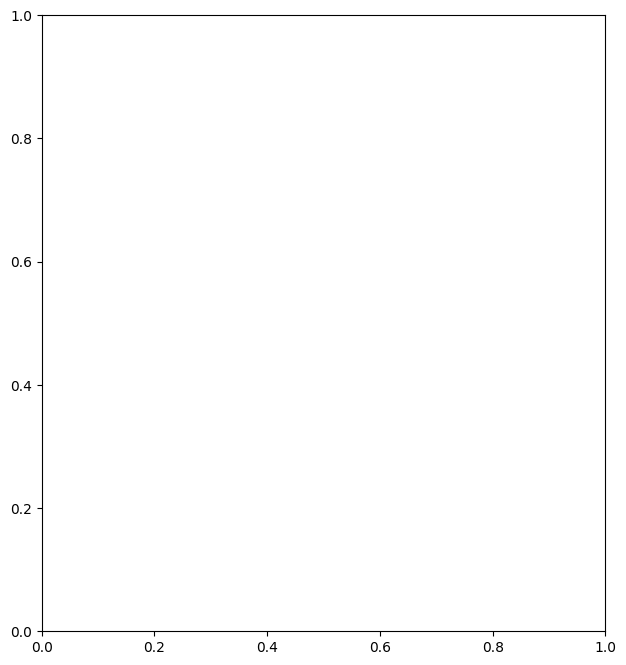

In [26]:
# MATPLOTLIB VISUALIZATIONS - Risk Assessment Dashboard
print("MATPLOTLIB RISK ASSESSMENT VISUALIZATIONS")
print("=" * 50)

# Set up the matplotlib style
plt.style.use('default')
fig = plt.figure(figsize=(16, 8))

# Visualization 1: Multi-Risk Factor Analysis Dashboard
ax1 = plt.subplot(1, 2, 1)

# Create a comprehensive risk matrix showing multiple risk factors
risk_high = processed_df[processed_df['Risk_Category'] == 'High Risk']
risk_medium = processed_df[processed_df['Risk_Category'] == 'Medium Risk'] 
risk_low = processed_df[processed_df['Risk_Category'] == 'Low Risk']

# Scatter plot with risk factors
scatter1 = ax1.scatter(risk_high['MMSE'], risk_high['Patient_Age'], 
                      s=risk_high['BMI']*3, c='red', alpha=0.7, 
                      label=f'High Risk (n={len(risk_high)})')
scatter2 = ax1.scatter(risk_medium['MMSE'], risk_medium['Patient_Age'], 
                      s=risk_medium['BMI']*3, c='orange', alpha=0.7,
                      label=f'Medium Risk (n={len(risk_medium)})')
scatter3 = ax1.scatter(risk_low['MMSE'], risk_low['Patient_Age'], 
                      s=risk_low['BMI']*3, c='green', alpha=0.7,
                      label=f'Low Risk (n={len(risk_low)})')

# Add risk threshold lines
ax1.axvline(x=24, color='black', linestyle='--', alpha=0.5, label='Normal MMSE Threshold')
ax1.axvline(x=18, color='red', linestyle='--', alpha=0.7, label='Cognitive Impairment Threshold')
ax1.axhline(y=75, color='blue', linestyle='--', alpha=0.5, label='High Age Risk Threshold')

ax1.set_xlabel('MMSE Score (Cognitive Function)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Patient Age', fontsize=11, fontweight='bold')
ax1.set_title('Risk Assessment Matrix\n(Bubble size = BMI)', fontsize=12, fontweight='bold')
ax1.legend(loc='upper right', fontsize=9)
ax1.grid(True, alpha=0.3)

# Visualization 2: Early Detection Alert Dashboard
ax2 = plt.subplot(1, 2, 2)

# Create risk score distribution with alert thresholds
risk_scores = processed_df['Risk_Score']
n_bins = 20

# Histogram with color coding
counts, bins, patches = ax2.hist(risk_scores, bins=n_bins, alpha=0.8, edgecolor='black')

# Color code the histogram bars based on risk levels
for i, patch in enumerate(patches):
    if bins[i] >= 7:  # High risk
        patch.set_facecolor('red')
        patch.set_alpha(0.8)
    elif bins[i] >= 5:  # Medium risk
        patch.set_facecolor('orange')
        patch.set_alpha(0.8)
    else:  # Low risk
        patch.set_facecolor('green')
        patch.set_alpha(0.8)

# Add vertical lines for risk thresholds
ax2.axvline(x=5, color='orange', linestyle='-', linewidth=2, label='Medium Risk Threshold')
ax2.axvline(x=7, color='red', linestyle='-', linewidth=2, label='High Risk Threshold')

# Add early detection statistics
early_detection_count = processed_df['Early_Detection_Flag'].sum()
ax2.text(0.02, 0.98, f'Early Detection Alerts: {early_detection_count}', 
         transform=ax2.transAxes, fontsize=10, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
         verticalalignment='top')

# Add high-risk patient count
high_risk_count = len(risk_high)
ax2.text(0.02, 0.88, f'High Risk Patients: {high_risk_count}', 
         transform=ax2.transAxes, fontsize=10, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="red", alpha=0.7),
         verticalalignment='top')

ax2.set_xlabel('Risk Score', fontsize=11, fontweight='bold')
ax2.set_ylabel('Number of Patients', fontsize=11, fontweight='bold')
ax2.set_title('Risk Score Distribution\n& Early Detection Alerts', fontsize=12, fontweight='bold')
ax2.legend(loc='upper right', fontsize=9)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Healthcare Risk Assessment & Early Detection Dashboard - Matplotlib', 
             fontsize=14, fontweight='bold', y=1.02)
plt.show()

print(f"\nDashboard Insights:")
print(f"• {high_risk_count} patients require immediate attention")
print(f"• {early_detection_count} patients flagged for early detection")
print(f"• Risk scores range from {risk_scores.min():.1f} to {risk_scores.max():.1f}")
print(f"• Average risk score: {risk_scores.mean():.2f}")
print("=" * 50)

Seaborn

SEABORN ADVANCED RISK PATTERN ANALYSIS
Creating comprehensive risk factor correlation heatmap...
Creating risk category distribution with clinical insights...
Creating risk category distribution with clinical insights...


C:\Users\F_bee\AppData\Local\Temp\ipykernel_17976\1824241701.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=processed_df, x='Risk_Category', y=metric,
C:\Users\F_bee\AppData\Local\Temp\ipykernel_17976\1824241701.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=processed_df, x='Risk_Category', y=metric,
C:\Users\F_bee\AppData\Local\Temp\ipykernel_17976\1824241701.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=processed_df, x='Risk_Category', y=metric,
C:\Users\F_bee\AppData\Local\Temp\ipykernel_17976\18242417

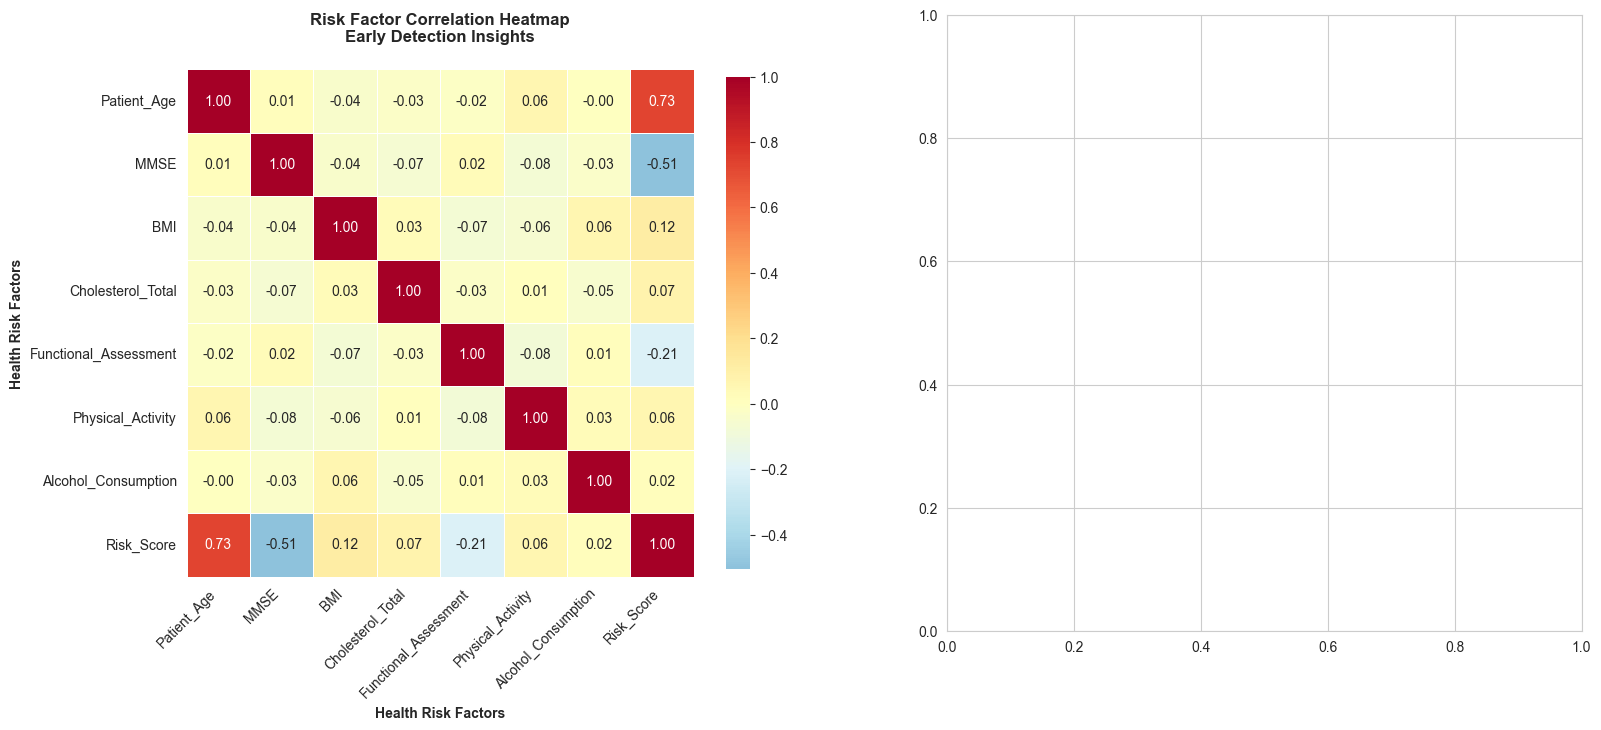

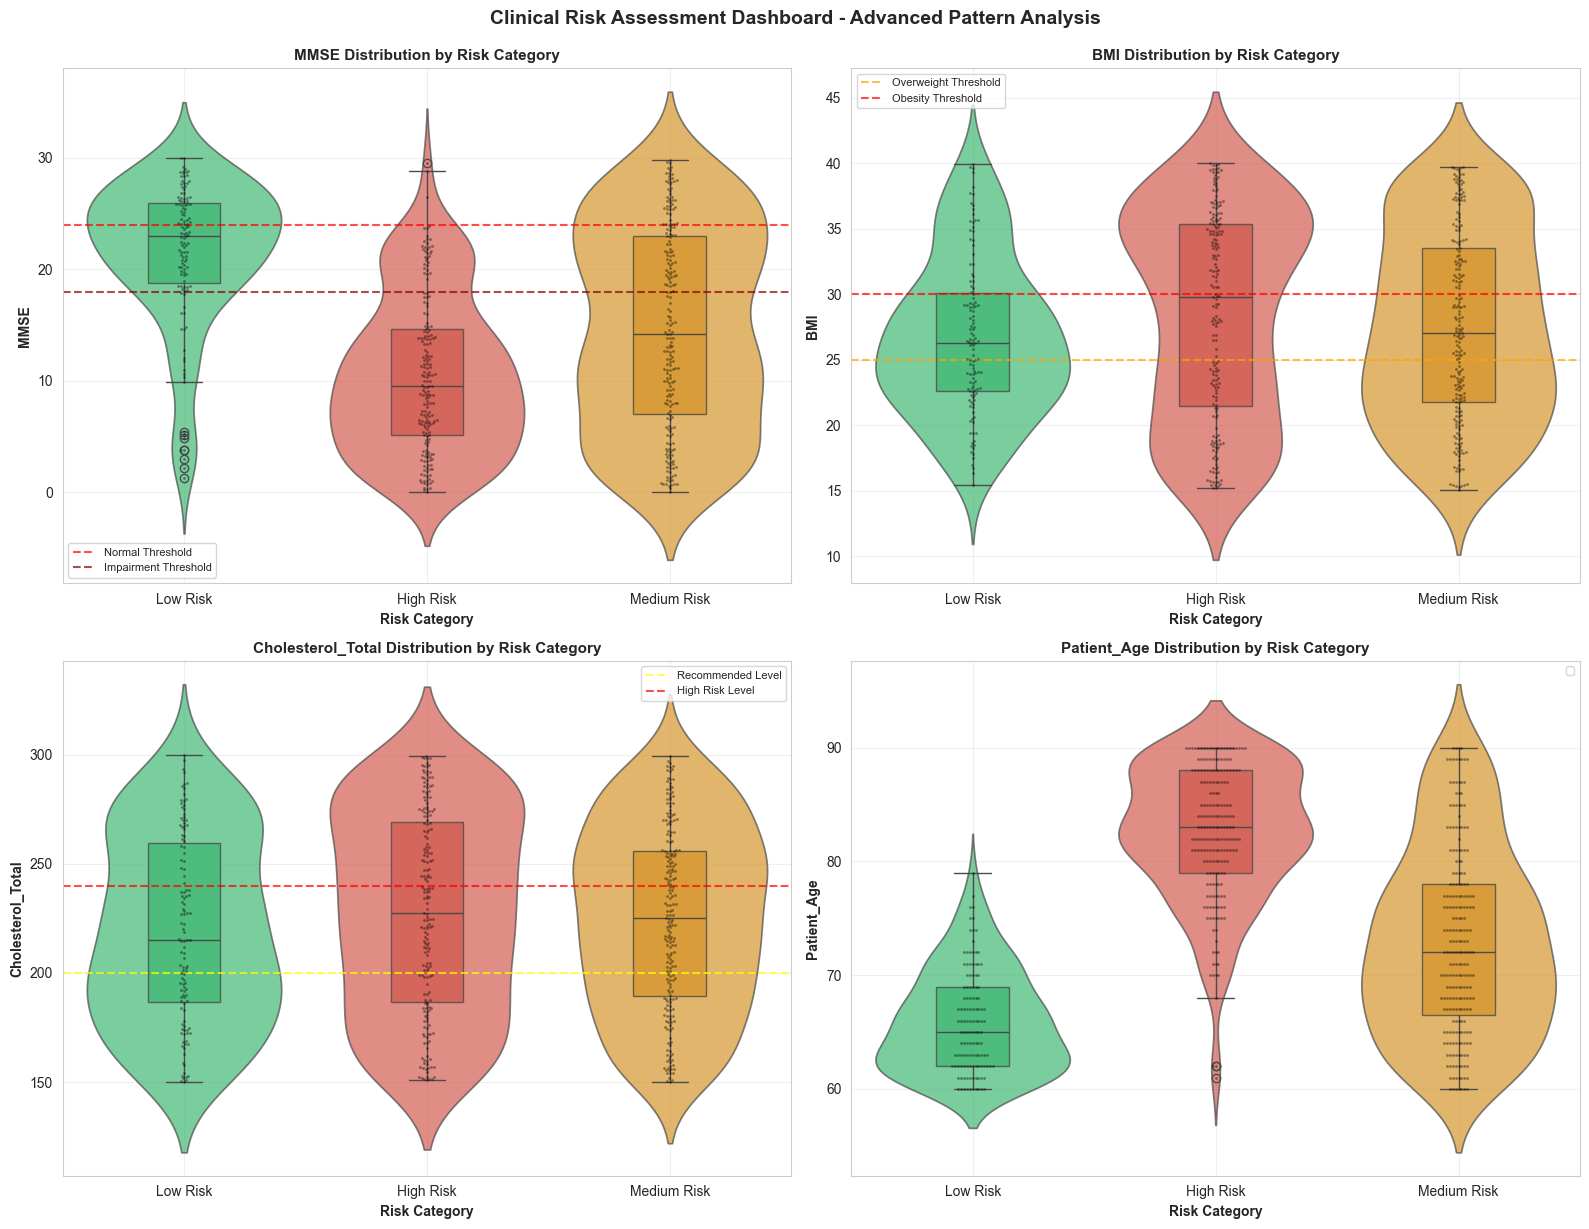


Clinical Risk Insights:

High Risk Patients (n=195):
  • Average MMSE: 10.5
  • Average Age: 82.4
  • Average BMI: 28.4
  • Early Detection Flags: 195

Medium Risk Patients (n=219):
  • Average MMSE: 14.7
  • Average Age: 72.8
  • Average BMI: 27.5
  • Early Detection Flags: 210

Low Risk Patients (n=123):
  • Average MMSE: 21.4
  • Average Age: 66.0
  • Average BMI: 26.7
  • Early Detection Flags: 64


In [ ]:
# SEABORN VISUALIZATIONS - Advanced Risk Pattern Analysis
print("SEABORN ADVANCED RISK PATTERN ANALYSIS")
print("=" * 50)

# Set seaborn style for professional healthcare dashboard
sns.set_style("whitegrid")
sns.set_palette("husl")

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18, 8))

# Visualization 1: Multi-dimensional Risk Heatmap
print("Creating comprehensive risk factor correlation heatmap...")

# Select key risk variables for correlation analysis
risk_variables = ['Patient_Age', 'MMSE', 'BMI', 'Cholesterol_Total', 
                  'Functional_Assessment', 'Physical_Activity', 
                  'Alcohol_Consumption', 'Risk_Score']

# Create correlation matrix
risk_correlation = processed_df[risk_variables].corr()

# Create annotated heatmap
sns.heatmap(risk_correlation, 
            annot=True, 
            cmap='RdYlBu_r',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": 0.8},
            ax=ax1,
            linewidths=0.5)

ax1.set_title('Risk Factor Correlation Heatmap\nEarly Detection Insights', 
              fontsize=12, fontweight='bold', pad=20)
ax1.set_xlabel('Health Risk Factors', fontsize=10, fontweight='bold')
ax1.set_ylabel('Health Risk Factors', fontsize=10, fontweight='bold')

# Rotate labels for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)

# Visualization 2: Risk Category Distribution with Clinical Metrics
print("Creating risk category distribution with clinical insights...")

# Prepare data for comprehensive boxplot analysis
clinical_metrics = ['MMSE', 'BMI', 'Cholesterol_Total', 'Patient_Age']

# Create subplot structure for multiple clinical metrics
fig2, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

# Custom color palette for risk categories
risk_colors = {'Low Risk': '#2ecc71', 'Medium Risk': '#f39c12', 'High Risk': '#e74c3c'}

for i, metric in enumerate(clinical_metrics):
    # Create violin plot with box plot overlay
    sns.violinplot(data=processed_df, x='Risk_Category', y=metric, 
                   palette=risk_colors, ax=axes[i], inner=None, alpha=0.7)
    
    # Add box plot for detailed statistics
    sns.boxplot(data=processed_df, x='Risk_Category', y=metric, 
                palette=risk_colors, ax=axes[i], width=0.3, 
                boxprops=dict(alpha=0.8))
    
    # Add swarm plot for individual patient data points
    sns.swarmplot(data=processed_df, x='Risk_Category', y=metric, 
                  color='black', alpha=0.4, size=2, ax=axes[i])
    
    axes[i].set_title(f'{metric} Distribution by Risk Category', 
                      fontsize=11, fontweight='bold')
    axes[i].set_xlabel('Risk Category', fontsize=10, fontweight='bold')
    axes[i].set_ylabel(metric, fontsize=10, fontweight='bold')
    axes[i].grid(True, alpha=0.3)
    
    # Add statistical annotations
    high_risk_median = processed_df[processed_df['Risk_Category'] == 'High Risk'][metric].median()
    low_risk_median = processed_df[processed_df['Risk_Category'] == 'Low Risk'][metric].median()
    
    # Add text annotation with clinical significance
    if metric == 'MMSE':
        axes[i].axhline(y=24, color='red', linestyle='--', alpha=0.7, 
                       label='Normal Threshold')
        axes[i].axhline(y=18, color='darkred', linestyle='--', alpha=0.7, 
                       label='Impairment Threshold')
    elif metric == 'BMI':
        axes[i].axhline(y=25, color='orange', linestyle='--', alpha=0.7, 
                       label='Overweight Threshold')
        axes[i].axhline(y=30, color='red', linestyle='--', alpha=0.7, 
                       label='Obesity Threshold')
    elif metric == 'Cholesterol_Total':
        axes[i].axhline(y=200, color='yellow', linestyle='--', alpha=0.7, 
                       label='Recommended Level')
        axes[i].axhline(y=240, color='red', linestyle='--', alpha=0.7, 
                       label='High Risk Level')
    
    axes[i].legend(loc='best', fontsize=8)

plt.tight_layout()
plt.suptitle('Clinical Risk Assessment Dashboard - Advanced Pattern Analysis', 
             fontsize=14, fontweight='bold', y=1.02)
plt.show()

# Risk category insights
print(f"\nClinical Risk Insights:")
print("=" * 40)
for risk_cat in ['High Risk', 'Medium Risk', 'Low Risk']:
    subset = processed_df[processed_df['Risk_Category'] == risk_cat]
    print(f"\n{risk_cat} Patients (n={len(subset)}):")
    print(f"  • Average MMSE: {subset['MMSE'].mean():.1f}")
    print(f"  • Average Age: {subset['Patient_Age'].mean():.1f}")
    print(f"  • Average BMI: {subset['BMI'].mean():.1f}")
    print(f"  • Early Detection Flags: {subset['Early_Detection_Flag'].sum()}")

print("=" * 50)

Plotly

In [ ]:
# PLOTLY VISUALIZATIONS - Interactive Risk Monitoring Dashboard
print("PLOTLY INTERACTIVE RISK MONITORING DASHBOARD")
print("=" * 50)

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.colors as colors

# Visualization 1: Interactive 3D Risk Assessment Scatter Plot
print("Creating interactive 3D risk assessment visualization...")

# Create 3D scatter plot with multiple risk dimensions
fig1 = go.Figure()

# Add traces for each risk category with different colors and sizes
risk_categories = processed_df['Risk_Category'].unique()
risk_colors_plotly = {'Low Risk': 'green', 'Medium Risk': 'orange', 'High Risk': 'red'}

for risk_cat in risk_categories:
    subset = processed_df[processed_df['Risk_Category'] == risk_cat]
    
    fig1.add_trace(go.Scatter3d(
        x=subset['Patient_Age'],
        y=subset['MMSE'],
        z=subset['BMI'],
        mode='markers',
        marker=dict(
            size=subset['Risk_Score'] * 2,  # Size based on risk score
            color=risk_colors_plotly[risk_cat],
            opacity=0.8,
            line=dict(width=2, color='black')
        ),
        name=f'{risk_cat} (n={len(subset)})',
        text=[f'Patient Age: {age}<br>MMSE: {mmse}<br>BMI: {bmi}<br>Risk Score: {score}<br>Cholesterol: {chol}' 
              for age, mmse, bmi, score, chol in zip(
                  subset['Patient_Age'], subset['MMSE'], subset['BMI'], 
                  subset['Risk_Score'], subset['Cholesterol_Total'])],
        hovertemplate='<b>%{text}</b><br>Risk Category: ' + risk_cat + '<extra></extra>'
    ))

# Update layout for professional dashboard appearance
fig1.update_layout(
    title={
        'text': 'Interactive 3D Risk Assessment Dashboard<br><sub>Early Detection & Risk Stratification</sub>',
        'x': 0.5,
        'font': {'size': 16, 'family': 'Arial, sans-serif'}
    },
    scene=dict(
        xaxis_title='Patient Age (Years)',
        yaxis_title='MMSE Score (Cognitive Function)', 
        zaxis_title='BMI (Body Mass Index)',
        bgcolor='rgba(240,240,240,0.9)',
        xaxis=dict(gridcolor='white', gridwidth=2),
        yaxis=dict(gridcolor='white', gridwidth=2),
        zaxis=dict(gridcolor='white', gridwidth=2)
    ),
    width=800,
    height=600,
    margin=dict(r=20, b=10, l=10, t=80),
    paper_bgcolor='rgba(255,255,255,0.9)',
    plot_bgcolor='rgba(240,240,240,0.9)'
)

fig1.show()

# Visualization 2: Interactive Risk Monitoring Dashboard with Time-based Analysis
print("Creating comprehensive risk monitoring dashboard...")

# Create multi-panel dashboard
fig2 = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "scatter"}, {"type": "bar"}],
           [{"colspan": 2, "type": "scatter"}, None]],
    subplot_titles=('Risk Score vs MMSE', 'Risk Category Distribution', 
                   'Comprehensive Health Risk Matrix'),
    vertical_spacing=0.12,
    horizontal_spacing=0.1
)

# Panel 1: Risk Score vs MMSE with trend analysis
for risk_cat in risk_categories:
    subset = processed_df[processed_df['Risk_Category'] == risk_cat]
    fig2.add_trace(
        go.Scatter(
            x=subset['MMSE'],
            y=subset['Risk_Score'],
            mode='markers',
            marker=dict(
                size=10,
                color=risk_colors_plotly[risk_cat],
                opacity=0.7,
                line=dict(width=1, color='black')
            ),
            name=risk_cat,
            text=[f'Age: {age}<br>BMI: {bmi}<br>Functional: {func}' 
                  for age, bmi, func in zip(subset['Patient_Age'], subset['BMI'], 
                                          subset['Functional_Assessment'])],
            hovertemplate='<b>MMSE: %{x}</b><br>Risk Score: %{y}<br>%{text}<extra></extra>',
            showlegend=True
        ),
        row=1, col=1
    )

# Panel 2: Risk category distribution bar chart
risk_counts = processed_df['Risk_Category'].value_counts()
fig2.add_trace(
    go.Bar(
        x=risk_counts.index,
        y=risk_counts.values,
        marker_color=[risk_colors_plotly[cat] for cat in risk_counts.index],
        text=risk_counts.values,
        textposition='auto',
        name='Patient Count',
        showlegend=False
    ),
    row=1, col=2
)

# Panel 3: Comprehensive health matrix (Age vs BMI, colored by risk)
fig2.add_trace(
    go.Scatter(
        x=processed_df['Patient_Age'],
        y=processed_df['BMI'],
        mode='markers',
        marker=dict(
            size=8,
            color=processed_df['Risk_Score'],
            colorscale='RdYlGn_r',
            colorbar=dict(
                title="Risk Score",
                x=1.02,
                len=0.4,
                y=0.2
            ),
            opacity=0.8,
            line=dict(width=1, color='black')
        ),
        text=[f'MMSE: {mmse}<br>Cholesterol: {chol}<br>Functional: {func}<br>Risk Category: {cat}' 
              for mmse, chol, func, cat in zip(
                  processed_df['MMSE'], processed_df['Cholesterol_Total'], 
                  processed_df['Functional_Assessment'], processed_df['Risk_Category'])],
        hovertemplate='<b>Age: %{x}</b><br>BMI: %{y}<br>%{text}<extra></extra>',
        name='Health Matrix',
        showlegend=False
    ),
    row=2, col=1
)

# Add reference lines for clinical thresholds
# MMSE threshold line
fig2.add_hline(y=6, line_dash="dash", line_color="red", 
               annotation_text="High Risk Threshold", 
               annotation_position="bottom right", row=1, col=1)

# BMI threshold lines
fig2.add_hline(y=30, line_dash="dash", line_color="orange", 
               annotation_text="Obesity Threshold", 
               annotation_position="top left", row=2, col=1)
fig2.add_vline(x=75, line_dash="dash", line_color="blue", 
               annotation_text="High Age Risk", 
               annotation_position="top right", row=2, col=1)

# Update layout for dashboard appearance
fig2.update_layout(
    title={
        'text': 'Comprehensive Risk Monitoring Dashboard<br><sub>Multi-dimensional Patient Risk Assessment</sub>',
        'x': 0.5,
        'font': {'size': 18, 'family': 'Arial, sans-serif'}
    },
    width=1000,
    height=800,
    margin=dict(r=100, b=10, l=10, t=100),
    paper_bgcolor='rgba(250,250,250,0.95)',
    plot_bgcolor='rgba(255,255,255,0.9)'
)

# Update axes labels
fig2.update_xaxes(title_text="MMSE Score", row=1, col=1)
fig2.update_yaxes(title_text="Risk Score", row=1, col=1)
fig2.update_xaxes(title_text="Risk Category", row=1, col=2)
fig2.update_yaxes(title_text="Patient Count", row=1, col=2)
fig2.update_xaxes(title_text="Patient Age", row=2, col=1)
fig2.update_yaxes(title_text="BMI", row=2, col=1)

fig2.show()

# Display key dashboard metrics
print(f"\nInteractive Dashboard Key Metrics:")
print("=" * 45)
print(f"• Total Patients Monitored: {len(processed_df)}")
print(f"• High Risk Alerts: {len(processed_df[processed_df['Risk_Category'] == 'High Risk'])}")
print(f"• Early Detection Flags: {processed_df['Early_Detection_Flag'].sum()}")
print(f"• Average Risk Score: {processed_df['Risk_Score'].mean():.2f}")
print(f"• Patients Requiring Immediate Intervention: {len(processed_df[processed_df['Risk_Score'] >= 7])}")
print(f"• Cognitive Impairment Cases (MMSE < 18): {len(processed_df[processed_df['MMSE'] < 18])}")
print("=" * 50)

PLOTLY INTERACTIVE RISK MONITORING DASHBOARD
Creating interactive 3D risk assessment visualization...


Creating comprehensive risk monitoring dashboard...



Interactive Dashboard Key Metrics:
• Total Patients Monitored: 537
• High Risk Alerts: 195
• Early Detection Flags: 469
• Average Risk Score: 6.30
• Patients Requiring Immediate Intervention: 195
• Cognitive Impairment Cases (MMSE < 18): 311


---

## **Conclusion**

---

### **Notes** 
**Method Decisions**
- Created the mapping and binary columns as the original data was populated with numerical values for all columns.
- Dropped several columns as aim was to focus on particular parameters (health and lifestyle) and to afford a more simplistic, less technical, viewer/user friendly application.
- Also extracted a fractioned/sampled DataFrame from the original at a random state for analysis purposes.

**Challenges Faced**
- Following package conflicts with packages like NumPy and Pandas the installation block was added as a precautionary measure.
- Needed to install Jupyter dependencies within the notebook, as kernel kept dying; Python kernel was restarted, then the necessary packages were downloaded.
- Pandas faced issues such as import errors and HTML errors; this was resolved via a Pandas update as well as using the print function. 
- Can look to consider more datasets in the future for greater insights.
- May also consider different approaches such as a braoder range of visualisations.

**Further Considerations**
- Consider not to rule out further factors, such head injury, other potential comordid diseases such as diabetes, or family history (these were included in the orginal dataset).
- Capitalize, drop missing values and remove duplicates were added for quality assurance purposes.

### **Reflection**
I choose Matplotlib for its simplistic range of visualisations and ease in generating means and medians. I chose Seaborn for its wide selection of charts, allowing for data to be depicted in different ways. Further, I chose Plotly for its ability in generating interactive charts and graphs.